**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.coverage.ranknorm.whg.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_score_starrmpra_ranknorm = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 60618     5


Region,ASTARR,LMPRA,WSTARR,Mean
chr1:100036895-100039189,0.9032466,0.9352832,0.9627008,0.9337436
chr1:100048290-100048918,0.0495727,0.0133706,0.0349896,0.0326443
chr1:100050225-100050529,0.7499258,0.0718681,0.8012307,0.5410082


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.tfmodule.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_tfmodule = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Group,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_02
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_05
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_10
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_44
chr1,136201,137353,chr1:136201-137353,TF_Module,Module_27
chr1,138321,139517,chr1:138321-139517,TF_Module,Module_02


In [4]:
vec = dat$Label
length(unique(vec))

[1] 70

In [5]:
dat = dat_region_score_starrmpra_ranknorm
dat = dat %>% dplyr::select(Region, Mean)
colnames(dat) = c("Region", "Score")

vec = dat$Score
names(vec) = dat$Region

dat_region_score = dat
vec_region_score = vec

print(dim(dat))
head(dat, 3)

[1] 60618     2


Region,Score
<chr>,<dbl>
chr1:100036895-100039189,0.93374355
chr1:100048290-100048918,0.03264432
chr1:100050225-100050529,0.54100817


In [6]:
dat = dat_region_annot_tfmodule
dat = dat %>% 
    dplyr::select(Region, Label) %>%
    dplyr::mutate(Value = 1) %>%
    tidyr::spread(Label, Value)

dat_region_annot = dat
print(dim(dat))
head(dat)

[1] 77726    71


Region,Module_01,Module_02,Module_03,Module_04,Module_05,Module_06,Module_07,Module_08,Module_09,⋯,Module_65,Module_66,Module_67,Module_68,Module_71,Module_72,Module_73,Module_74,Module_75,Module_77
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100036895-100039189,NA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1:100048290-100048918,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1:100050225-100050529,NA,NA,NA,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1:100099076-100100488,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1:100130577-100130967,1,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr1:100132375-100133491,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
dat = dplyr::left_join(
    dat_region_score, 
    dat_region_annot,
    by = c("Region")
)
dat = dat %>% replace(is.na(.), 0)

dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 60618    72


Region,Score,Module_01,Module_02,Module_03,Module_04,Module_05,Module_06,Module_07,Module_08,⋯,Module_65,Module_66,Module_67,Module_68,Module_71,Module_72,Module_73,Module_74,Module_75,Module_77
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100036895-100039189,0.93374355,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100048290-100048918,0.03264432,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100050225-100050529,0.54100817,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100132375-100133491,0.91814588,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:10015258-10016191,0.16646046,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100248956-100250290,0.72932407,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
dat = dat_region_merge
dat = dat %>% tidyr::gather(Group, Label, -Region, -Score)

dat_region_arrange = dat
print(dim(dat))
head(dat)

[1] 4243260       4


Region,Score,Group,Label
<chr>,<dbl>,<chr>,<dbl>
chr1:100036895-100039189,0.93374355,Module_01,0
chr1:100048290-100048918,0.03264432,Module_01,0
chr1:100050225-100050529,0.54100817,Module_01,0
chr1:100132375-100133491,0.91814588,Module_01,0
chr1:10015258-10016191,0.16646046,Module_01,0
chr1:100248956-100250290,0.72932407,Module_01,1


In [9]:
dat = dat_region_arrange
dat = dat %>%
    dplyr::group_by(Group, Label) %>%
    dplyr::summarise(
        Count   = n(),
        Median  = median(Score),
        IQR     = IQR(Score),
        .groups = "drop"
    )

dat_des_summary = dat
print(dim(dat))
head(dat)

[1] 140   5


Group,Label,Count,Median,IQR
<chr>,<dbl>,<int>,<dbl>,<dbl>
Module_01,0,55819,0.4794890,0.3304615
Module_01,1,4799,0.5790634,0.3251248
Module_02,0,50936,0.5073438,0.3335093
Module_02,1,9682,0.3927478,0.2773365
Module_03,0,58315,0.4844436,0.3320933
Module_03,1,2303,0.5625887,0.3234339


In [10]:
dat = dat_des_summary
dat = dat %>% 
    dplyr::mutate(Label = paste("Label", Label, sep = "_")) %>%
    dplyr::select(Group, Label, Median) %>%
    tidyr::spread(Label, Median) %>%
    dplyr::mutate(Diff = Label_1 - Label_0)

dat_dif_summary = dat
print(dim(dat))
head(dat)

[1] 70  4


Group,Label_0,Label_1,Diff
<chr>,<dbl>,<dbl>,<dbl>
Module_01,0.4794890,0.5790634,0.09957438
Module_02,0.5073438,0.3927478,-0.11459605
Module_03,0.4844436,0.5625887,0.07814511
Module_04,0.4818481,0.5582858,0.07643769
Module_05,0.4841026,0.5635152,0.07941261
Module_06,0.4781982,0.5741446,0.09594647


In [15]:
dat = dat_region_arrange
dat = dat %>% dplyr::mutate(Label = paste("Label", Label, sep = "_"))
lst = split(dat, dat$Group)
lst_dat_lab = lst

dat = dat_dif_summary
lst = split(dat$Diff, dat$Group)
lst_num_dif = lst

In [16]:
idx = "Module_01"
dat = lst_dat_lab[[idx]]
head(dat)

Region,Score,Group,Label
<chr>,<dbl>,<chr>,<chr>
chr1:100036895-100039189,0.93374355,Module_01,Label_0
chr1:100048290-100048918,0.03264432,Module_01,Label_0
chr1:100050225-100050529,0.54100817,Module_01,Label_0
chr1:100132375-100133491,0.91814588,Module_01,Label_0
chr1:10015258-10016191,0.16646046,Module_01,Label_0
chr1:100248956-100250290,0.72932407,Module_01,Label_1


In [14]:
idx = "Module_01"
num = lst_num_dif[[idx]]
num

[1] 0.09957438

In [21]:
sample(1:5, replace=FALSE)

[1] 3 5 2 1 4

In [59]:
fun = function(dat){
    dat$Label = sample(dat$Label)
    lst = split(dat$Score, dat$Label)
    lst = lapply(lst, median)
    num = lst$Label_1 - lst$Label_0
    return(num)
}

In [67]:
num_iter = 10000
idx = "Module_01"
dat = lst_dat_lab[[idx]]
num = lst_num_dif[[idx]]

set.seed(123)
vec = replicate(num_iter, fun(dat))
tmp = mean(vec >= num)
tmp

[1] 0

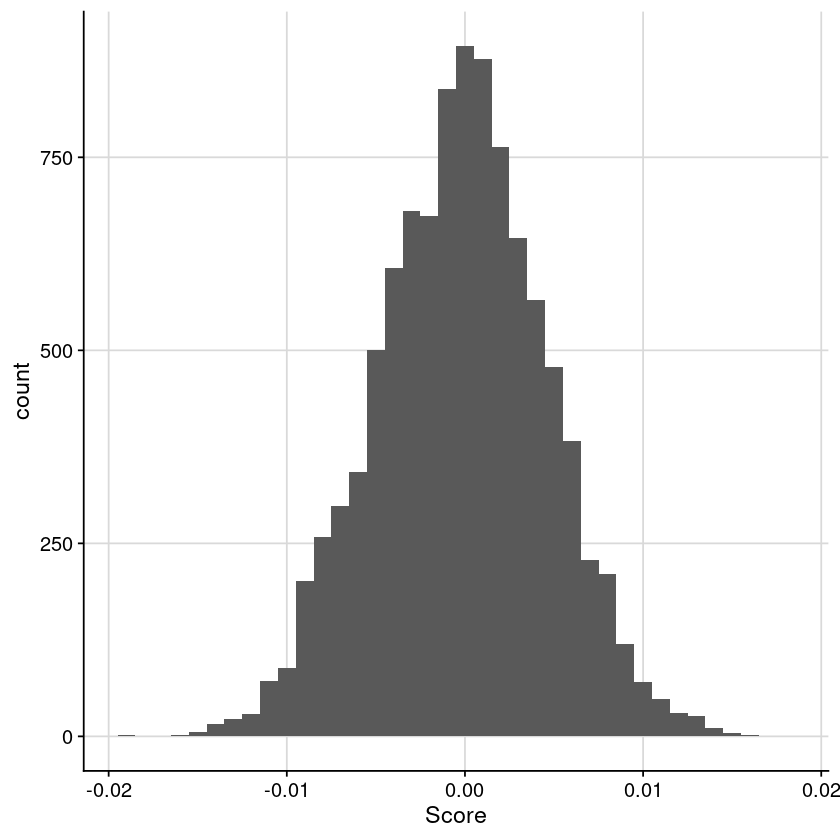

In [69]:
dat = data.frame(Score = vec)
gpt = ggplot(dat, aes(x=Score)) +
    geom_histogram(binwidth = 0.001) +
    theme_cowplot() +
    background_grid()
print(gpt)

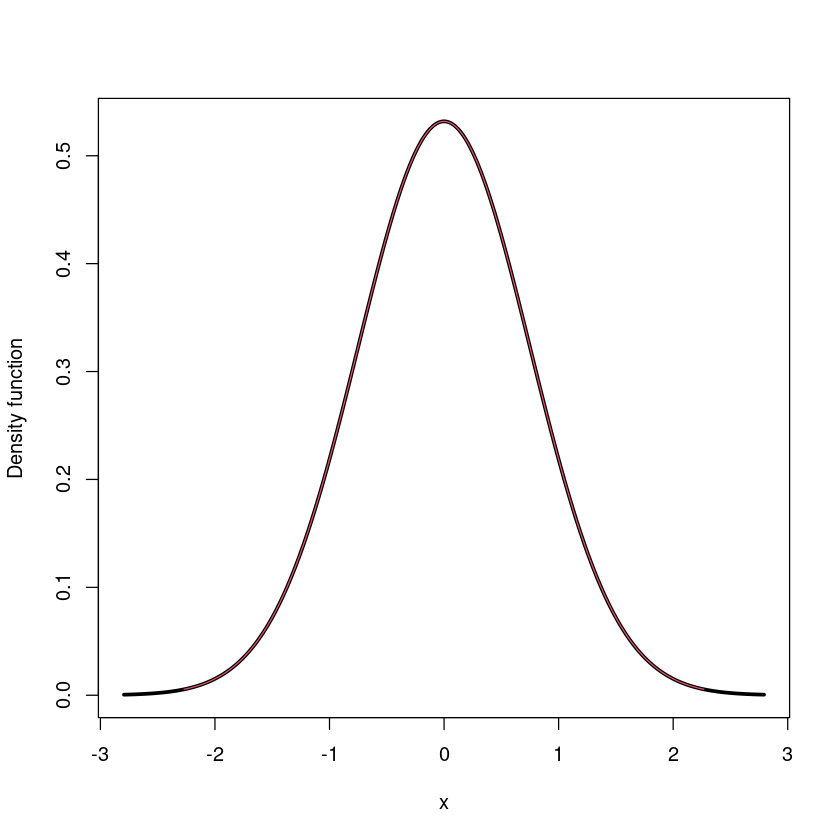

In [75]:
bw <- 0.75
plot(kde <- ks::kde(x = vec, h = bw), lwd = 3) # ?ks::plot.kde for options
lines(density(x = vec, bw = bw), col = 2)

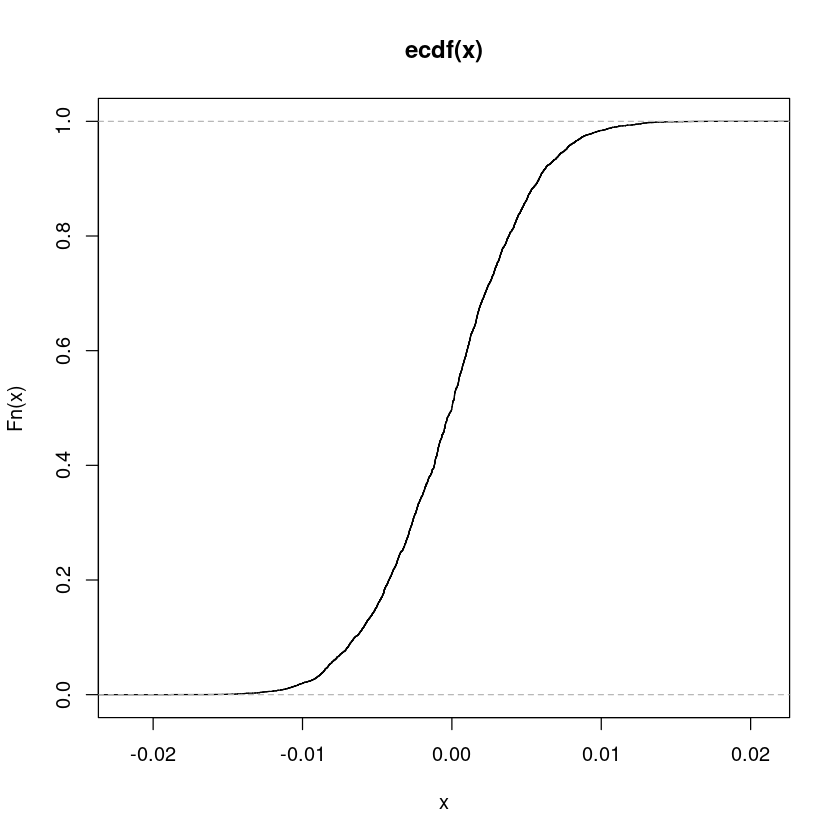

In [82]:
plot.ecdf(vec)

In [73]:
tmp = ecdf(vec)
tmp(num)

[1] 1

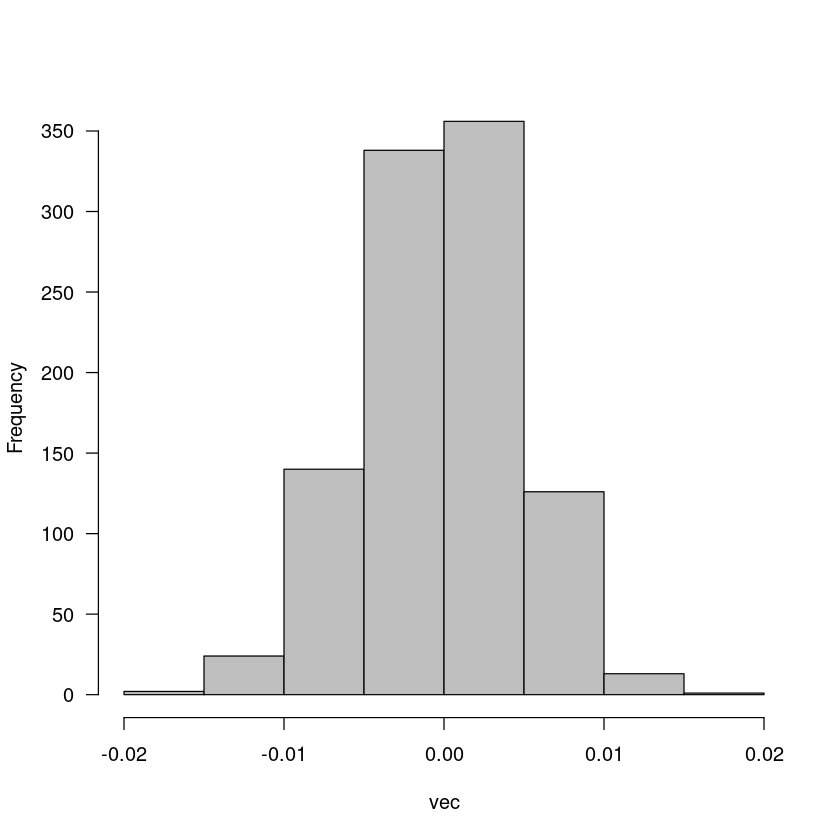

In [65]:
hist(vec,col="gray",las=1,main="")
abline(v=num,col="red")

In [66]:
num

[1] 0.09957438

In [58]:
num_iter = 100
idx = "Module_01"
dat = lst_dat_lab[[idx]]

set.seed(123)

dat$Label = sample(dat$Label)

lst = split(dat$Score, dat$Label)
lst = lapply(lst, median)
num = lst$Label_1 - lst$Label_0
print(num)

[1] -0.009771575


In [45]:
sample(dat$Label) %>% head(100)

[1] "Label_0" "Label_0" "Label_0" "Label_1" "Label_0" "Label_0" "Label_0"
  [8] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [15] "Label_0" "Label_0" "Label_0" "Label_0" "Label_1" "Label_0" "Label_0"
 [22] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [29] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [36] "Label_0" "Label_0" "Label_1" "Label_0" "Label_0" "Label_0" "Label_0"
 [43] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [50] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [57] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [64] "Label_0" "Label_0" "Label_0" "Label_1" "Label_0" "Label_0" "Label_0"
 [71] "Label_0" "Label_0" "Label_0" "Label_1" "Label_0" "Label_0" "Label_0"
 [78] "Label_0" "Label_0" "Label_1" "Label_0" "Label_0" "Label_0" "Label_1"
 [85] "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0" "Label_0"
 [92] "Label_0" "Label_0" "Label_0" "Label_0" "Label_1" "Label_0" "Label_0"
 [99] "Label_0" "Label_0"

Region,Score,Group,Label
<chr>,<dbl>,<chr>,<chr>
chr1:100036895-100039189,0.93374355,Module_01,Label_0
chr1:100048290-100048918,0.03264432,Module_01,Label_0
chr1:100050225-100050529,0.54100817,Module_01,Label_0
chr1:100132375-100133491,0.91814588,Module_01,Label_0
chr1:10015258-10016191,0.16646046,Module_01,Label_0
chr1:100248956-100250290,0.72932407,Module_01,Label_1


In [ ]:
vec_txt_module = names(lst_lab)
lst = lapply(vec_txt_module, function(idx){
    
})a

In [22]:
dat = dat_region_arrange
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    res = wilcox.test(Score ~ Label, data = dat, exact = FALSE)
    return(res)
})
lst_fit_wilcox = lst
print(length(lst))
print(names(lst))

[1] 70
 [1] "Module_01" "Module_02" "Module_03" "Module_04" "Module_05" "Module_06"
 [7] "Module_07" "Module_08" "Module_09" "Module_10" "Module_11" "Module_12"
[13] "Module_13" "Module_14" "Module_15" "Module_16" "Module_17" "Module_18"
[19] "Module_19" "Module_20" "Module_21" "Module_22" "Module_23" "Module_24"
[25] "Module_25" "Module_26" "Module_27" "Module_28" "Module_29" "Module_30"
[31] "Module_31" "Module_33" "Module_34" "Module_35" "Module_36" "Module_37"
[37] "Module_39" "Module_40" "Module_41" "Module_42" "Module_43" "Module_44"
[43] "Module_45" "Module_46" "Module_47" "Module_48" "Module_49" "Module_50"
[49] "Module_51" "Module_52" "Module_53" "Module_54" "Module_55" "Module_56"
[55] "Module_57" "Module_58" "Module_59" "Module_61" "Module_63" "Module_64"
[61] "Module_65" "Module_66" "Module_67" "Module_68" "Module_71" "Module_72"
[67] "Module_73" "Module_74" "Module_75" "Module_77"


In [68]:
dat = dat_region_arrange
lst = split(dat, dat$Group)

dat = lst[[2]]
res = wilcox.test(Score ~ Label, data = dat, exact = FALSE)
print(res)
print(res$p.value)


	Wilcoxon rank sum test with continuity correction

data:  Score by Label
W = 309488138, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0

[1] 0


In [51]:
lst = lst_fit_wilcox
lst = lapply(lst, function(res){res$p.value})
vec = unlist(lst)

dat = data.frame(Group = names(vec), pval = vec)
dat = dat %>% 
    dplyr::mutate(padj    = p.adjust(pval, method = "BH")) %>%
    dplyr::mutate(nlog10p = -log10(padj))

dat_fit_summary = dat
print(dim(dat))
head(dat)

[1] 70  4


,Group,pval,padj,nlog10p
,<chr>,<dbl>,<dbl>,<dbl>
Module_01,Module_01,5.262701e-131,2.046606e-130,129.68897
Module_02,Module_02,0.000000e+00,0.000000e+00,Inf
Module_03,Module_03,1.571698e-43,3.333906e-43,42.47705
Module_04,Module_04,3.299061e-68,8.553121e-68,67.06788
Module_05,Module_05,1.745127e-43,3.592909e-43,42.44455
Module_06,Module_06,1.023296e-140,4.213572e-140,139.37535


In [35]:
-log10(0.001)

[1] 2

In [60]:
dat = dplyr::left_join(
    dat_diff_summary, 
    dat_fit_summary,
    by = "Group")

dat_res_summary = dat
print(dim(dat))
head(dat)

[1] 70  7


Group,Label_0,Label_1,Diff,pval,padj,nlog10p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Module_01,0.4794890,0.5790634,0.09957438,5.262701e-131,2.046606e-130,129.68897
Module_02,0.5073438,0.3927478,-0.11459605,0.000000e+00,0.000000e+00,Inf
Module_03,0.4844436,0.5625887,0.07814511,1.571698e-43,3.333906e-43,42.47705
Module_04,0.4818481,0.5582858,0.07643769,3.299061e-68,8.553121e-68,67.06788
Module_05,0.4841026,0.5635152,0.07941261,1.745127e-43,3.592909e-43,42.44455
Module_06,0.4781982,0.5741446,0.09594647,1.023296e-140,4.213572e-140,139.37535


In [61]:
dat = dat_res_summary
dat %>% dplyr::filter(is.infinite(nlog10p))

Group,Label_0,Label_1,Diff,pval,padj,nlog10p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Module_02,0.5073438,0.3927478,-0.1145960,0,0,Inf
Module_11,0.4755065,0.7083416,0.2328351,0,0,Inf
Module_31,0.4786670,0.7137883,0.2351213,0,0,Inf
Module_42,0.4774943,0.6849286,0.2074343,0,0,Inf


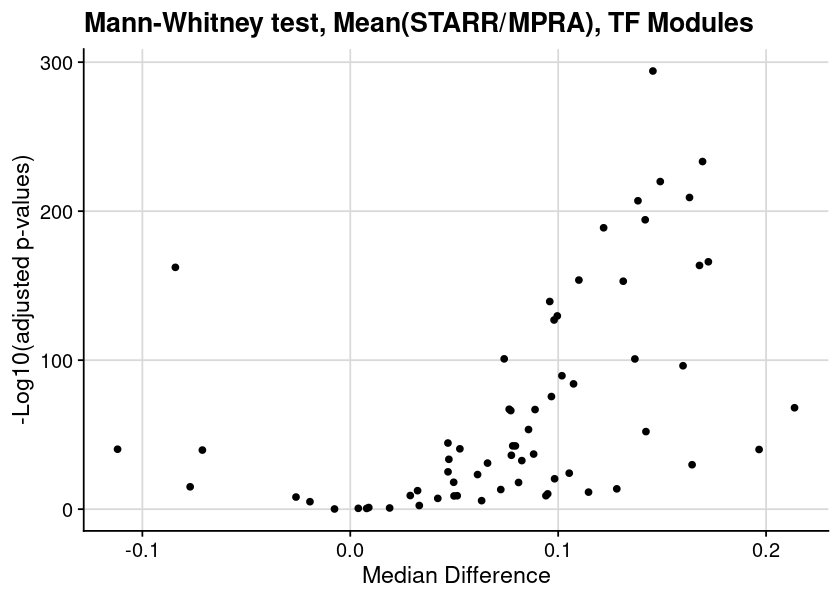

In [64]:
dat = dat %>% dplyr::filter(!is.infinite(nlog10p)) 

gpt = ggplot(dat, aes(x=Diff, y = nlog10p)) +
    geom_point() +
    labs(
        x = "Median Difference", 
        y = "-Log10(adjusted p-values)",
        title = "Mann-Whitney test, Mean(STARR/MPRA), TF Modules"
    ) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)